First step is connecting to the drive to access corpus audio files.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Generate spectrograms

The first step is to load the WAV files, use a python package named `Librosa` to generate spectrogram images from them, load the spectrograms into memory and prepare them for use in training a CNN.

In [1]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

  y, sr = librosa.load(audio_file)
  ms = librosa.feature.melspectrogram(y=y, sr=sr)
  log_ms = librosa.power_to_db(ms, ref=np.max)
  librosa.display.specshow(log_ms, sr=sr)

  fig.savefig(image_file)
  plt.close(fig)


def create_pngs_from_wavs(input_path, output_path):
  if not os.path.exists(output_path):
    os.makedirs(output_path)

  dir = os.listdir(input_path)

  for i, file in enumerate(dir):
    input_file = os.path.join(input_path, file)
    output_file = os.path.join(output_path, file.split('.')[0] + '.png')
    if os.path.exists(output_file):
      continue
    create_spectrogram(input_file, output_file)

In [5]:
for i in range(2, 6):
  create_pngs_from_wavs(f"/content/drive/My Drive/Internship/Audio/{i}", f"/content/drive/My Drive/Internship/Spectrograms/{i}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Check if the number of spectrograms corresponds to the number of audio files:

In [4]:
total_len = 0

for i in range(2, 6):
  total_len += len(os.listdir(f'/content/drive/My Drive/Internship/Spectrograms/{i}'))
  if len(os.listdir(f'/content/drive/My Drive/Internship/Spectrograms/{i}')) == len(os.listdir(f'/content/drive/My Drive/Internship/Audio/{i}')):
    print('OK')
  else:
    print('NOT OK')

print(total_len)

OK
OK
OK
OK
248


Declare 2 new helper function for loading and displaying spectrograms. Declare also 2 python lists (1 to store spectrogram images, 1 to store class labels).

In [7]:
from keras.preprocessing import image

def load_image_from_path(path, label):
  images = []
  labels = []

  for file in os.listdir(path):
    images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
    labels.append(label)

  return images, labels

In [10]:
def show_images(images):
  if len(images) < 8:
    fig, axes = plt.subplots(1, len(images), figsize=(20, 20), subplot_kw={'xticks':[], 'yticks':[]})
  else:
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks':[], 'yticks':[]})

  for i, ax in enumerate(axes.flat):
    ax.imshow(images[i] / 255)

x = []
y = []

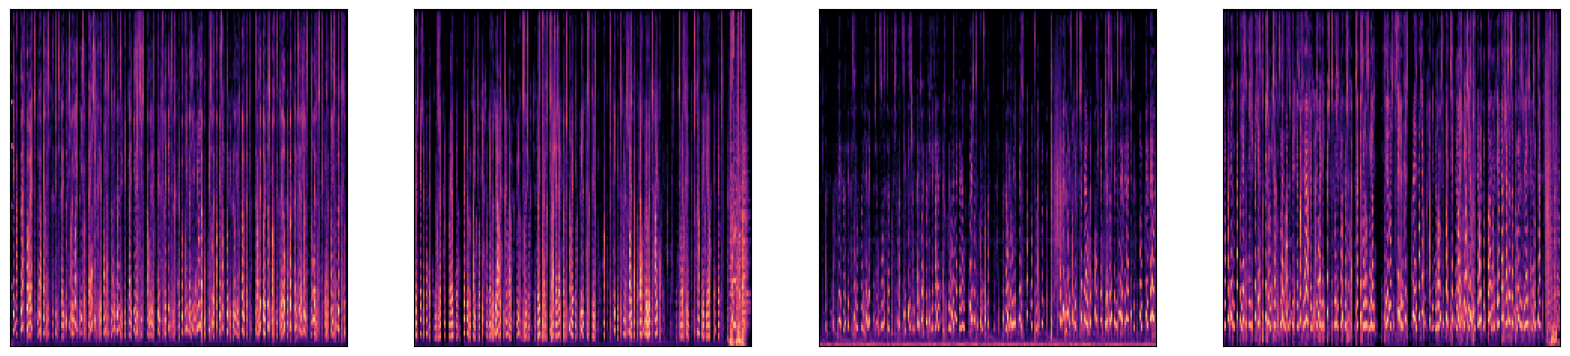

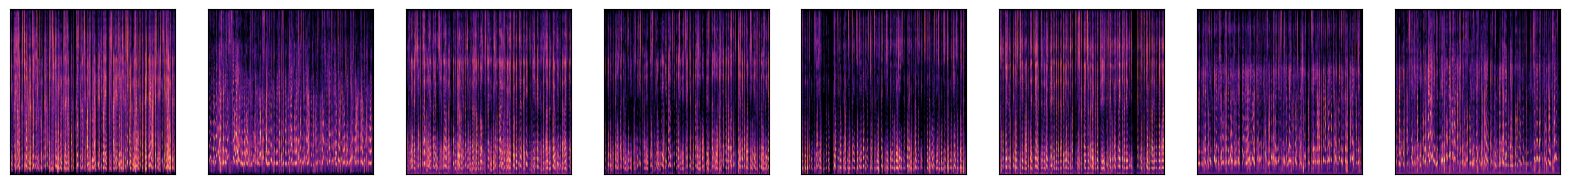

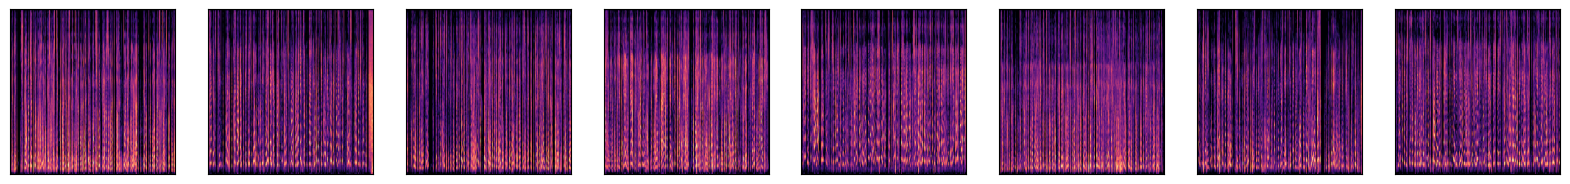

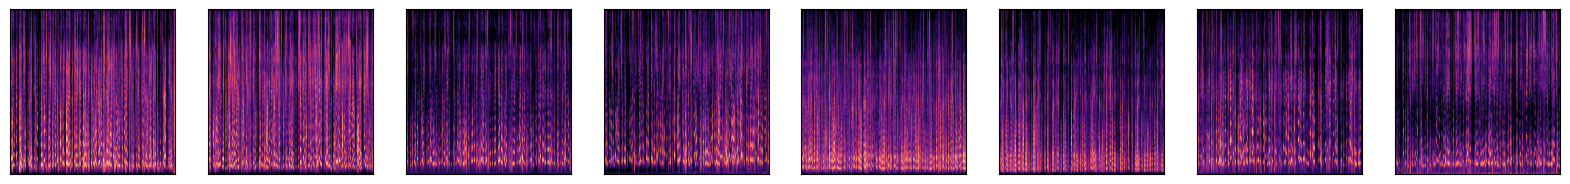

In [11]:
for i in range(2, 6):
  images, labels = load_image_from_path(f'/content/drive/My Drive/Internship/Spectrograms/{i}', i)
  show_images(images)
  x += images
  y += labels